In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
df = pd.read_csv('../datasets/RIASEC_Dataset_clustered.csv')
X = df.drop(columns=['major_cluster'])
y = df['major_cluster']

In [4]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('nb', GaussianNB())
])

In [7]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    pipeline, X_train, y_train,
    cv=kfold, scoring='f1_macro'
)
print(f"🚀 F1_macro (cross-val, tránh leakage): {cv_scores.mean():.4f}")

🚀 F1_macro (cross-val, tránh leakage): 0.2357


In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('nb', GaussianNB())])

In [9]:
y_pred = pipeline.predict(X_test)

In [10]:
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f"✅ F1_macro trên tập test: {test_f1:.4f}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ F1_macro trên tập test: 0.2378

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.32      0.39      2777
           1       0.35      0.31      0.33      1023
           3       0.25      0.14      0.18       710
           4       0.15      0.13      0.14       567
           5       0.06      0.17      0.09       212
           6       0.16      0.22      0.19       249
           7       0.23      0.14      0.18       590
           8       0.24      0.45      0.32       476
           9       0.08      0.27      0.12       157
          11       0.39      0.54      0.46      1190

    accuracy                           0.31      7951
   macro avg       0.24      0.27      0.24      7951
weighted avg       0.35      0.31      0.31      7951



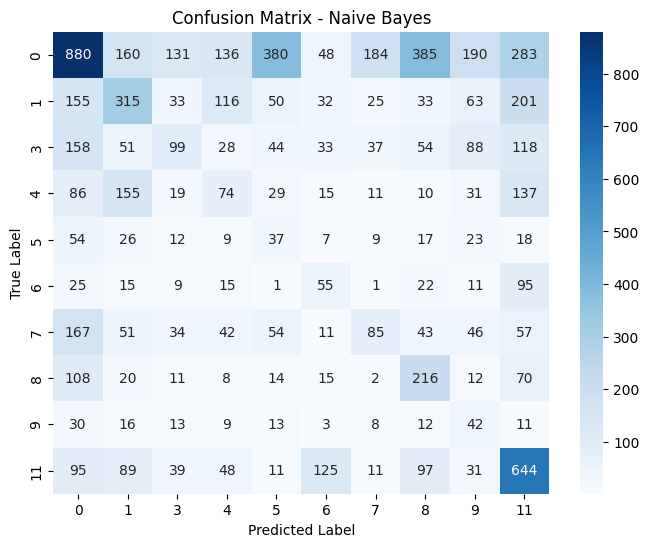

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
joblib.dump(scaler, '../models/scaler_nb.joblib')
joblib.dump(pipeline, '../models/naive_bayes_pipeline.joblib')
print("💾 Đã lưu scaler và mô hình vào thư mục models/")